# KIVA Data

Name: Dylan Connor and Kaung Khin  
Andrew ID: dmconnor | Kkhin

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from IPython import display 
import scikitplot as skplt

In [114]:
#import dill
#dill.dump_session('notebook_env_v3.db')

In [5]:
import dill
dill.load_session('notebook_env_v3.db')

## Wrangling for ML

In [3]:
#Read cleaned data
ml_data_trim = pd.read_csv("output_data/ML_Final_Data_v2.csv")

In [4]:
ml_data_trim.shape

(618813, 21)

In [3]:
ml_data_trim.head(2)

,Unnamed: 0,status,loan_amount,activity,sector,country,currency,partner_id,number,amount,...,term_in_months,borrower_genders,repayment_interval,original_language,days_to_expiration,year,month,lat,lon,MPI
0,0,funded,575.0,Rickshaw,Transportation,Pakistan,PKR,247.0,9569.0,4171675.0,...,11.0,"female, female",irregular,English,30,2014,1,30.085400,71.581756,0.230320
1,1,funded,150.0,Transportation,Transportation,India,INR,334.0,930.0,241700.0,...,43.0,female,bullet,English,30,2014,1,25.849213,88.925566,0.191099


In [4]:
#Take activity and partners with at least .5% of the loans make everything else "Other"
temp = ml_data_trim['activity'].value_counts()/ml_data_trim.shape[0]
top_activity = temp[temp>.005].index

temp = ml_data_trim['partner_id'].value_counts()/ml_data_trim.shape[0]
top_partners = temp[temp>.005].index


In [5]:
ml_data_trim['activity'] = ml_data_trim['activity'].apply(lambda v : v if v in top_activity else "Other")

In [6]:
ml_data_trim['partner_id'] = ml_data_trim['partner_id'].apply(lambda v : v if v in top_partners else "Other")

In [9]:
# Get counts of male and female genders
ml_data_trim['female_count'] = ml_data_trim['borrower_genders'].apply(lambda v : v.count('female'))
ml_data_trim['male_count'] = ml_data_trim['borrower_genders'].apply(lambda v : v.count('male') - v.count('female'))

In [10]:
#Get status field and drop from X data.
status = ml_data_trim['status']
status = pd.get_dummies(status)['expired']

In [11]:
#For graphing columns against statuus
ml_data_trim.to_csv('output_data/for_status_graphs.csv')

In [8]:
ml_data_trim = ml_data_trim.drop('status', axis = 1)
status.value_counts()


0    579934
1     38879
Name: expired, dtype: int64

In [10]:
ml_data_trim = ml_data_trim.drop(['borrower_genders','Unnamed: 0','date','lat','lon'], axis = 1)

In [11]:
ml_data_trim.columns

Index(['loan_amount', 'activity', 'sector', 'country', 'currency',
       'partner_id', 'number', 'amount', 'term_in_months',
       'repayment_interval', 'original_language', 'days_to_expiration', 'year',
       'month', 'MPI', 'female_count', 'male_count'],
      dtype='object')

In [12]:
#Unique counts
ml_data_trim.apply(lambda s : s.nunique())

loan_amount           466
activity               44
sector                 15
country                78
currency               61
partner_id             48
number                391
amount                631
term_in_months        146
repayment_interval      3
original_language       5
days_to_expiration     62
year                    4
month                  12
MPI                    68
female_count           49
male_count             40
dtype: int64

In [13]:
#Get dummy columns
ml_data_trim = pd.get_dummies(ml_data_trim)

In [14]:
ml_data_trim.apply(lambda s : s.nunique()).head()

loan_amount           466
number                391
amount                631
term_in_months        146
days_to_expiration     62
dtype: int64

In [15]:
ml_data_trim.shape

(618813, 264)

In [16]:
#Min Max scaling Normalization
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(ml_data_trim.values)
x = pd.DataFrame(data_scaled)
x.columns = ml_data_trim.columns
ml_data_trim = x

In [17]:
ml_data_trim.head()

,loan_amount,number,amount,term_in_months,days_to_expiration,year,month,MPI,female_count,male_count,...,partner_id_428.0,partner_id_Other,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly,original_language_English,original_language_French,original_language_Portuguese,original_language_Russian,original_language_Spanish
0,0.005501,0.144201,0.201878,0.057692,0.012987,0.0,0.0,0.413199,0.04,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.001250,0.014001,0.011687,0.262821,0.012987,0.0,0.0,0.342837,0.02,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.001750,0.144201,0.201878,0.057692,0.012987,0.0,0.0,0.413199,0.02,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.003751,0.031921,0.048338,0.076923,0.012987,0.0,0.0,0.413199,0.02,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.001750,0.014001,0.011687,0.262821,0.012987,0.0,0.0,0.342837,0.02,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
ml_data_trim.to_csv('output_data/Final_final.csv')

# Classification Task

## Without Dealing with Unbalanced Classes

In [18]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(ml_data_trim, status, test_size=0.2, shuffle=True, stratify = status, random_state = 123)

In [94]:
X_train_u.shape

(495050, 264)

In [19]:
y_test_u.value_counts()

0    115987
1      7776
Name: expired, dtype: int64

In [20]:
#Homebrew cross-validation
def detector_cross_val(classifier, XTrain, yTrain, folds, score = "f1_score"):
    
    yTrain = np.array(yTrain)
    if type(XTrain) == type(pd.DataFrame()):
        XTrain = XTrain.as_matrix()
    #StratifiedKFold
    k_fold = StratifiedKFold(folds, random_state= 123, shuffle=True, )
    fold_scores = []
    for k, (train, val) in enumerate(k_fold.split(XTrain, yTrain)):
        classifier.fit(XTrain[train],yTrain[train])
        y_pred = classifier.predict(XTrain[val])
        y_val = yTrain[val]
        if score == "f1_score":
            fold_scores.append(f1_score(y_val, y_pred, average='weighted'))
        else:
            fold_scores.append(accuracy_score(y_val, y_pred))
    
    return np.mean(fold_scores)


### Random Forest

In [23]:
#Cross validation perfomed in other workbook. Optimal parameters based on f1 crossvalidation
clf_ub1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=193, n_jobs=-1,
            oob_score=False, random_state=None,
            warm_start=False).fit(X_train_u, y_train_u)
y_pred = clf_ub1.predict(X_test_u)
print(f1_score(y_test_u, y_pred, average='weighted'))
cm = confusion_matrix(y_test_u, y_pred)
cm

0.933464847488


array([[114776,   1211],
       [  5692,   2084]], dtype=int64)

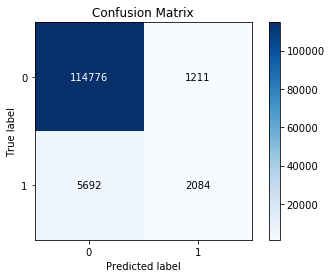

In [24]:
#Confusion Matrix
y_pred = clf_ub1.predict(X_test_u)
cm = confusion_matrix(y_test_u, y_pred)
skplt.metrics.plot_confusion_matrix(y_test_u, y_pred)

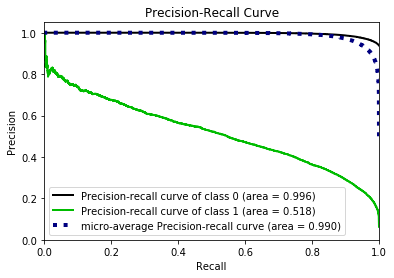

In [7]:
# Precision recall
y_pred = clf_ub1.predict_proba(X_test_u)
skplt.metrics.plot_precision_recall_curve(y_test_u, y_pred)

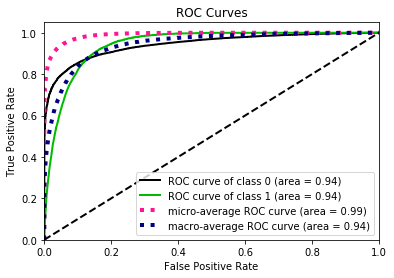

In [26]:
#ROC Curve
skplt.metrics.plot_roc_curve(y_test_u, y_pred)

In [12]:
#Example of sliding threshold
confusion_matrix(y_test_u, [1 if i[1] >.175 else 0 for i in y_pred])

array([[107008,   8979],
       [  1905,   5871]], dtype=int64)

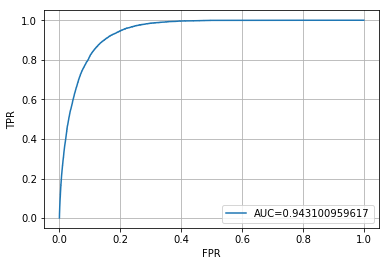

0.94310095961690887

In [27]:
#For full ROC curve model compare
y_pred = clf_ub1.predict_proba(X_test_u)
fpr1, tpr1, thresholds = roc_curve(y_test_u, [i[1] for i in y_pred], pos_label=1)

#fpr1, tpr1, thresholds1 = roc_curve(y_test_u, [i[1] for i in y_pred], pos_label=1)
auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, label="AUC=" + str(auc1))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc1

## Naive Bayes

In [ ]:
range1 = np.logspace(-2,10,5)

BNB_score_list = []
for i in range1:
    BNB_score_list.append([i, detector_cross_val(BernoulliNB(alpha = i), X_train, y_train, folds= 3)])
    print(i, end= " ")

In [ ]:
BNB_score_list.sort(reverse=True, key = lambda x: x[1])
BNB_score_list

In [87]:
#Cross validated to .01 for optimal solution
clf_ubnb = BernoulliNB(alpha = 0.01)
clf_ubnb.fit(X_train_u, y_train_u)
y_pred = clf_ubnb.predict(X_test_u)

0.856487009541
[[97184 18803]
 [ 3720  4056]]


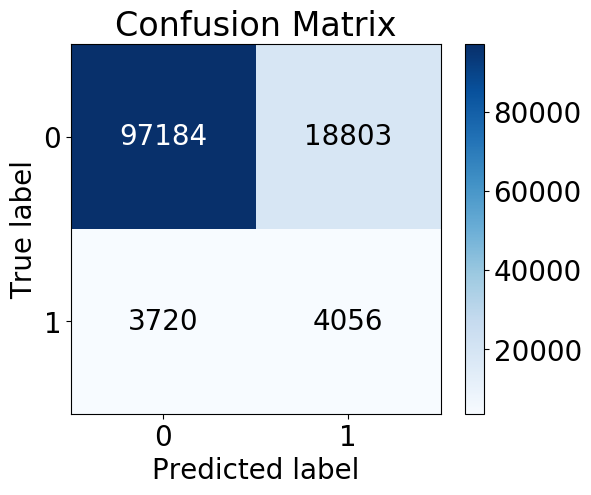

In [88]:
cm = confusion_matrix(y_test_u, y_pred)
print(f1_score(y_test_u, y_pred, average='weighted'))
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

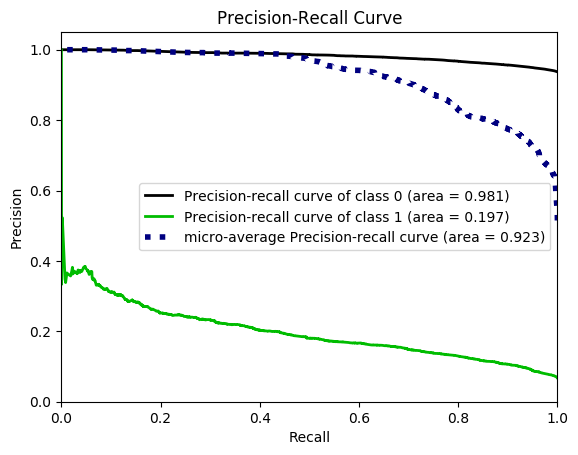

In [92]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
y_pred = clf_ubnb.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

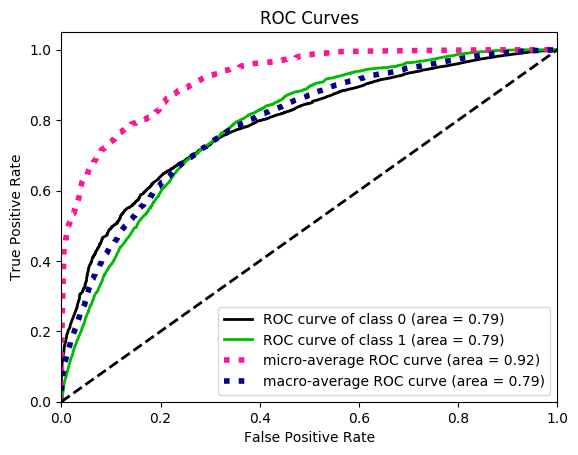

In [93]:
skplt.metrics.plot_roc_curve(y_test, y_pred)

## Dealing with Balanced Classes

In [28]:
#Using SMOTE as primary analysis method. ADASYN was tested as well. SMOTEENN and SMOTETomek never finish running
X_train, X_test, y_train, y_test = train_test_split(ml_data_trim, status, test_size=0.2, shuffle=True, stratify = status, random_state = 123)

X_train, y_train = SMOTE().fit_sample(X_train, y_train)
#X_train, y_train = ADASYN().fit_sample(X_train, y_train)
#X_train, y_train = SMOTEENN(random_state=123).fit_sample(X_train, y_train)
#X_train, y_train = SMOTETomek(random_state=123).fit_sample(X_train, y_train)

In [29]:
X_train.shape

(927894, 264)

### PCA Analysis

In [35]:
pca2 = PCA(n_components=2).fit(X_train_u.T)

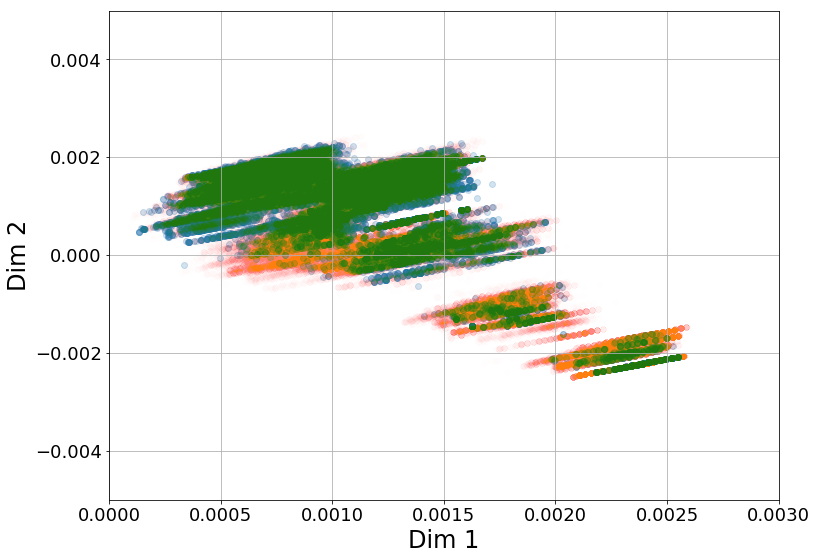

In [36]:
matplotlib.rcParams.update({'font.size': 24})
plt.figure(figsize = (12,9))
plt.grid()
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

plt.scatter(x = pca2.components_.T[[True if i == 1 else False for i in y_train_u],0], y= pca2.components_.T[[True if i == 1 else False for i in y_train_u],1], alpha=.2)
plt.scatter(x = pca2.components_.T[[True if i == 0 else False for i in y_train_u],0], y= pca2.components_.T[[True if i == 0 else False for i in y_train_u],1], alpha=.005)
plt.xlim((0,.003))
plt.ylim((-.005,.005))

plt.savefig('graphs/PCA No SMOTE.png')


In [33]:
pca = PCA(n_components=2).fit(X_train.T)

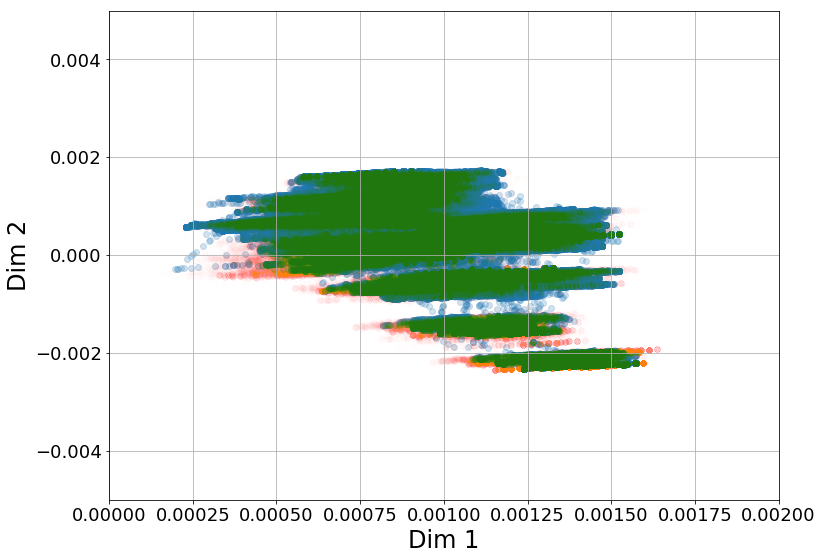

In [34]:
matplotlib.rcParams.update({'font.size': 24})
plt.figure(figsize = (12,9))
plt.grid()
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

plt.scatter(x = pca.components_.T[[True if i == 1 else False for i in y_train],0], y= pca.components_.T[[True if i == 1 else False for i in y_train],1], alpha=.2)
plt.scatter(x = pca.components_.T[[True if i == 0 else False for i in y_train],0], y= pca.components_.T[[True if i == 0 else False for i in y_train],1], alpha=.005)
plt.xlim((0,.002))
plt.ylim((-.005,.005))

plt.savefig('graphs/PCA SMOTE.png')


## KNN

In [138]:
#KNN Cross val
from sklearn.naive_bayes import BernoulliNB

range1 = [2,4,6,8,10]
KNN_score_list = []
for i in range1:
    KNN_score_list.append([i, detector_cross_val(KNeighborsClassifier(n_neighbors=i), X_train, y_train, folds= 3)])
    print(i, end= " ")

2 4 6 8 10 

In [140]:
#Output got merged with a different list. Can ignore bottom 3 values
KNN_score_list.sort(reverse=True, key = lambda x: x[1])
KNN_score_list

[[4, 0.90742144362549537],
 [2, 0.90646684405257316],
 [6, 0.905940130993097],
 [8, 0.90474481686186603],
 [10, 0.90350547611101517],
 [0.01, 0.88469481510451276],
 [10000.0, 0.834674467680529],
 [10000000000.0, 0.33951666723333052]]

In [95]:
clfn = KNeighborsClassifier(n_neighbors =4)# KNN_score_list[0][0])
clfn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [96]:
y_pred = clfn.predict_proba(X_test)

In [113]:
y_pred_knn = y_pred

0.910072782831
[[106912   9075]
 [  3555   4221]]


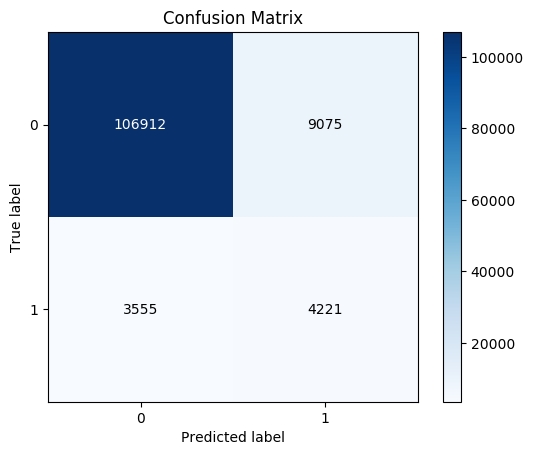

In [99]:
cm = confusion_matrix(y_test, [1 if i[1] > .5 else 0 for i in y_pred])
print(f1_score(y_test, [1 if i[1] > .5 else 0 for i in y_pred], average='weighted'))
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, [1 if i[1] > .5 else 0 for i in y_pred])

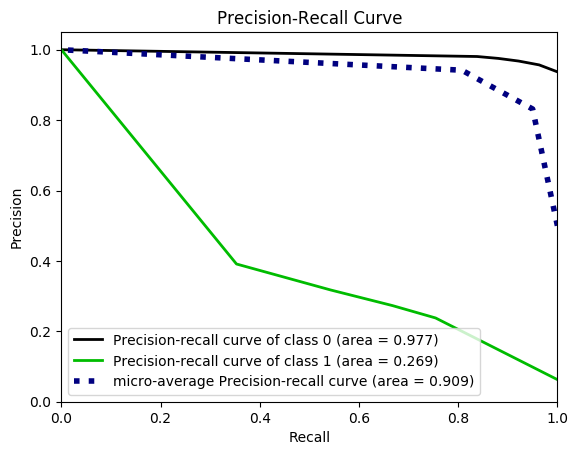

In [100]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

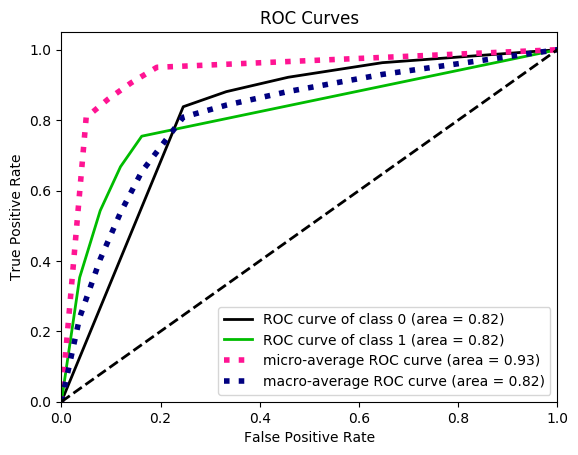

In [101]:
skplt.metrics.plot_roc_curve(y_test, y_pred)

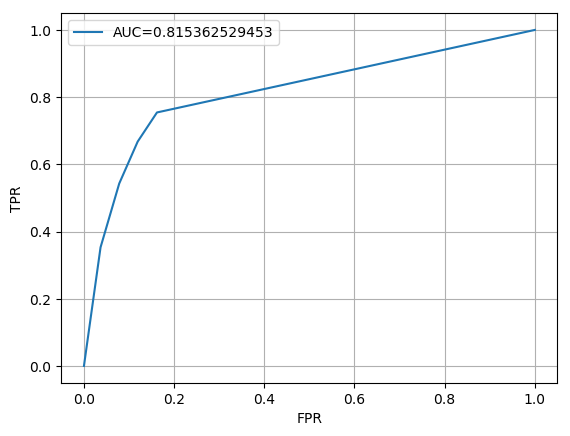

0.81536252945333287

In [102]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, [i[1] for i in y_pred], pos_label=1)
auc2 = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, label="AUC=" + str(auc2))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc2

### Naive Bayes

In [87]:
range1 = np.logspace(-2,10,5)

BNB_score_list = []
for i in range1:
    BNB_score_list.append([i, detector_cross_val(BernoulliNB(alpha = i), X_train, y_train, folds= 3)])
    print(i, end= " ")

0.01 10.0 10000.0 10000000.0 10000000000.0 

In [88]:
BNB_score_list.sort(reverse=True, key = lambda x: x[1])
BNB_score_list

[[0.01, 0.72760236637448827],
 [10.0, 0.72730872981391281],
 [10000.0, 0.71922165119543469],
 [10000000.0, 0.71314597346097175],
 [10000000000.0, 0.71309154159782817]]

In [37]:
clf_bnb = BernoulliNB(alpha = 0.01)
clf_bnb.fit(X_train, y_train)
y_pred = clf_bnb.predict(X_test)

0.756926033318
[[77224 38763]
 [ 1734  6042]]


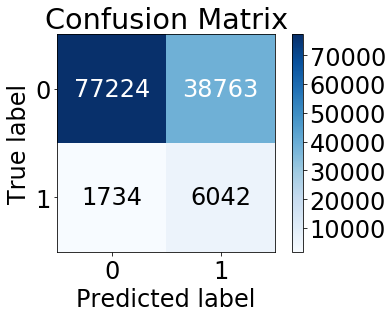

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(f1_score(y_test, y_pred, average='weighted'))
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

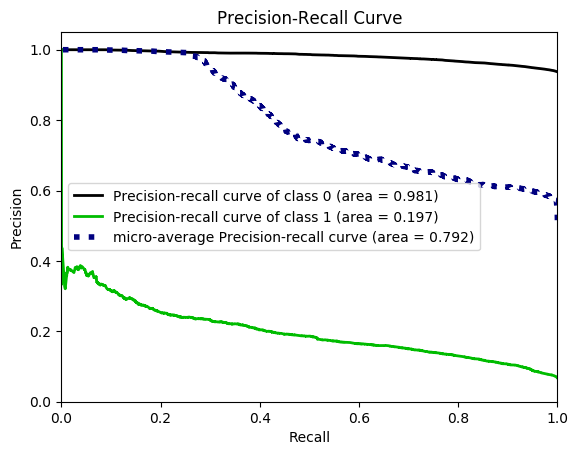

In [43]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
y_pred = clf_bnb.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

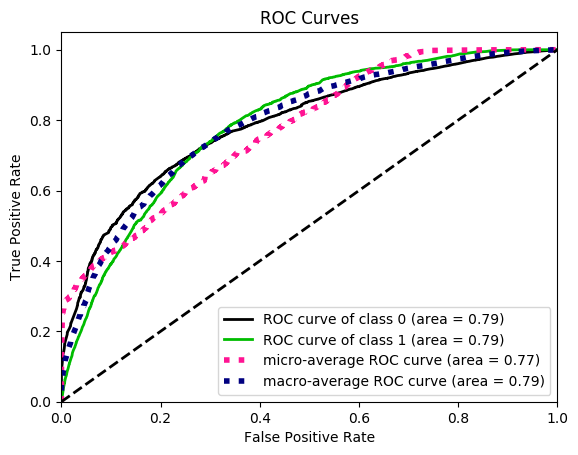

In [44]:
skplt.metrics.plot_roc_curve(y_test, y_pred)

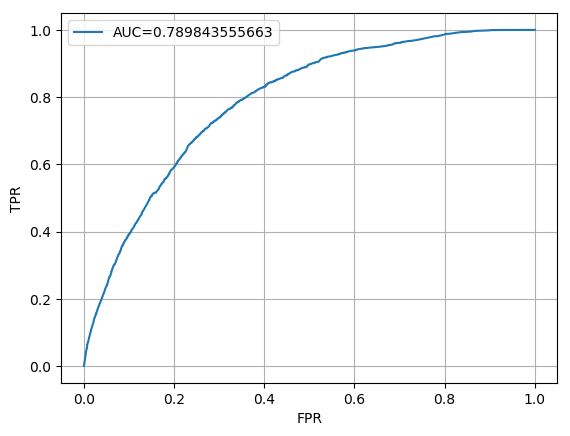

0.78984355566348596

In [45]:
fpr3, tpr3, thresholds = roc_curve(y_test, [i[1] for i in y_pred], pos_label=1)
auc3 = auc(fpr3, tpr3)

plt.plot(fpr3, tpr3, label="AUC=" + str(auc3))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc3

## SVM

SVMs were run in preliminary analyses. Only linear SVC could finish running. All other kernel attempts stalled out. Analysis left out of final components because cannot calculate probabilities with LinearSVC classifier, so no AUC or recall precision curve can be calculated

In [83]:
from sklearn import svm

range1 = np.logspace(-4, 3, 5)

SVM_score_list = []
for c in range1:
    SVM_score_list.append([c, detector_cross_val(svm.LinearSVC(C=c), X_train, y_train, folds= 3)])
    print(c, end= " ")

In [99]:
SVM_score_list.sort(reverse=True, key = lambda x: x[1])
SVM_score_list[0:5]

[[0.0001, 0.65837865997793299],
 [1000.0, 0.52309988865837054],
 [0.31622776601683794, 0.42787770381899276]]

In [166]:
clf_svm = svm.LinearSVC(C=.0001).fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)


In [167]:
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

0.763345221394
0.681633386684


array([[73905, 35548],
       [ 1649,  5735]], dtype=int64)

In [12]:
y_pred = clf_svm.predict(X_test)

fpr4, tpr4, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc4 = auc(fpr4, tpr4)

plt.plot(fpr, tpr, label="AUC=" + str(auc4))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc4

## Random Forest

In [2]:
n_estimators = [50,100,200]
max_features = ['auto', 'sqrt']
max_depth = [10,30,50,100]
max_depth.append(None)
min_samples_split = [2, 6,10]
min_samples_leaf = [1, 2,4]
bootstrap = [True, False]

params = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
           'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [47]:
clfrf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = clfrf, param_distributions = params, n_iter = 20, cv = 3, random_state=123, n_jobs = -1, verbose = 1, scoring = 'f1')
rf_random.fit(X_train, y_train)

In [7]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
clf_brf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.9min finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.4s finished


0.921590463449
[[106523   9464]
 [  1908   5868]]


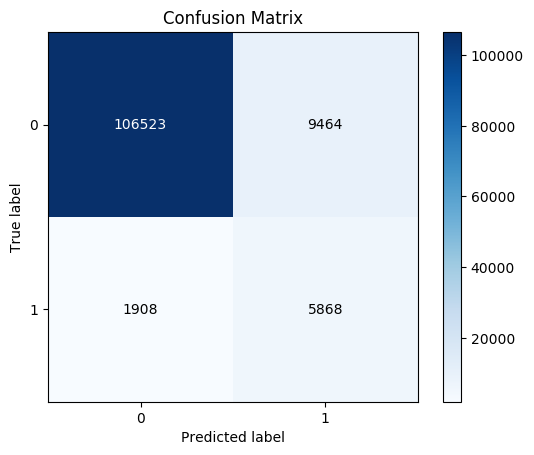

In [49]:
y_pred = clf_brf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
cm = confusion_matrix(y_test, y_pred)
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.5s finished


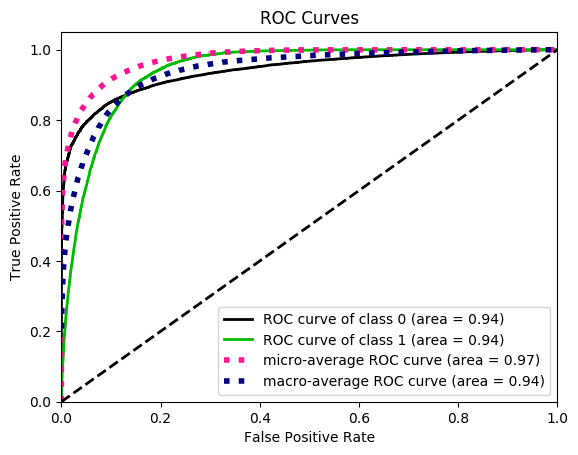

In [51]:
y_pred = clf_brf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)

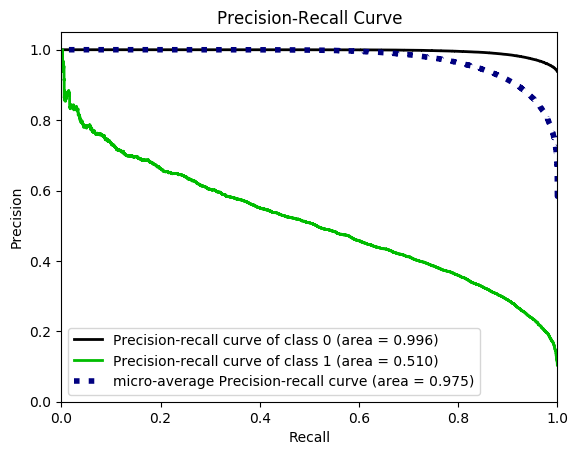

In [52]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

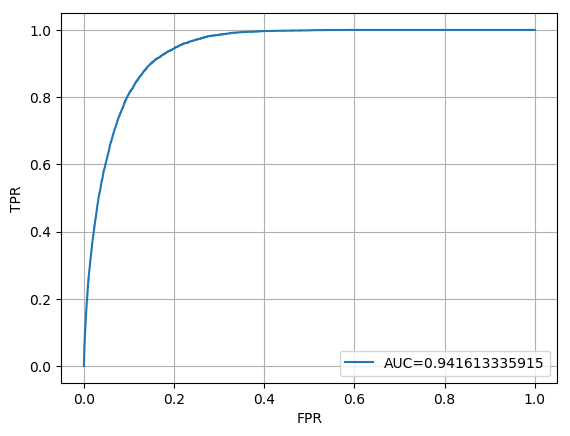

0.94161333591521779

In [53]:
fpr5, tpr5, thresholds = roc_curve(y_test, [i[1] for i in y_pred], pos_label=1)
auc5 =  auc(fpr5, tpr5)

plt.plot(fpr5, tpr5, label="AUC=" + str(auc5))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc5

### Variable Importance Graphs

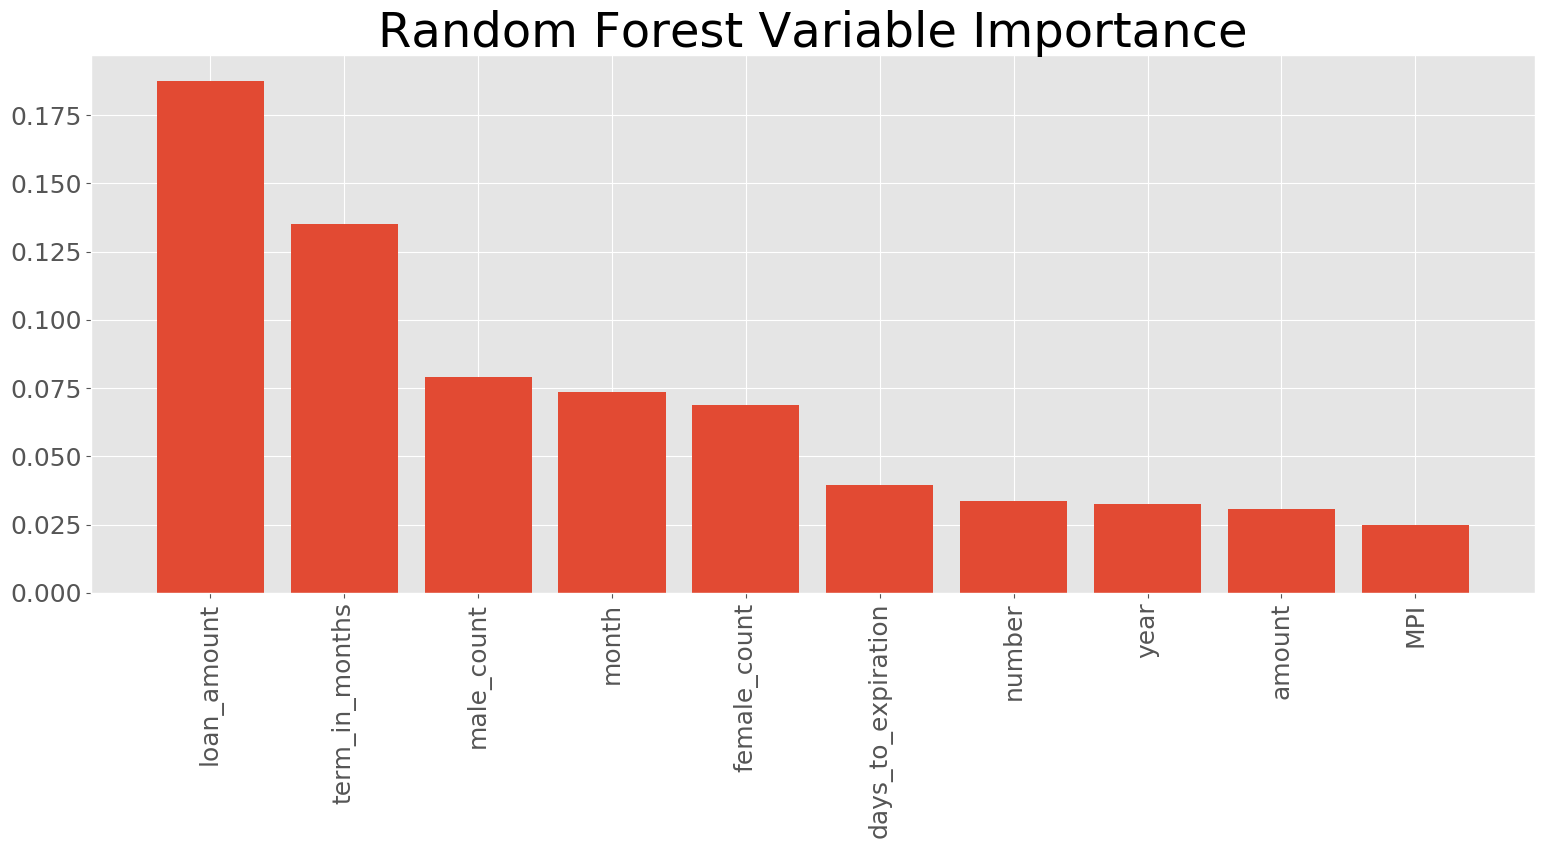

In [54]:
#Top ten
var_imp = clf_brf.feature_importances_
order = var_imp.argsort()[::-1][:]
ml_data_trim.columns[order]

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 24})
plt.figure(figsize = (16,9))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

plt.bar(range(10), var_imp[order][0:10])
plt.xticks(range(10), ml_data_trim.columns.values[order][0:10], rotation='vertical')
plt.title("Random Forest Variable Importance")
plt.tight_layout()
plt.savefig('graphs/var_importance.png')

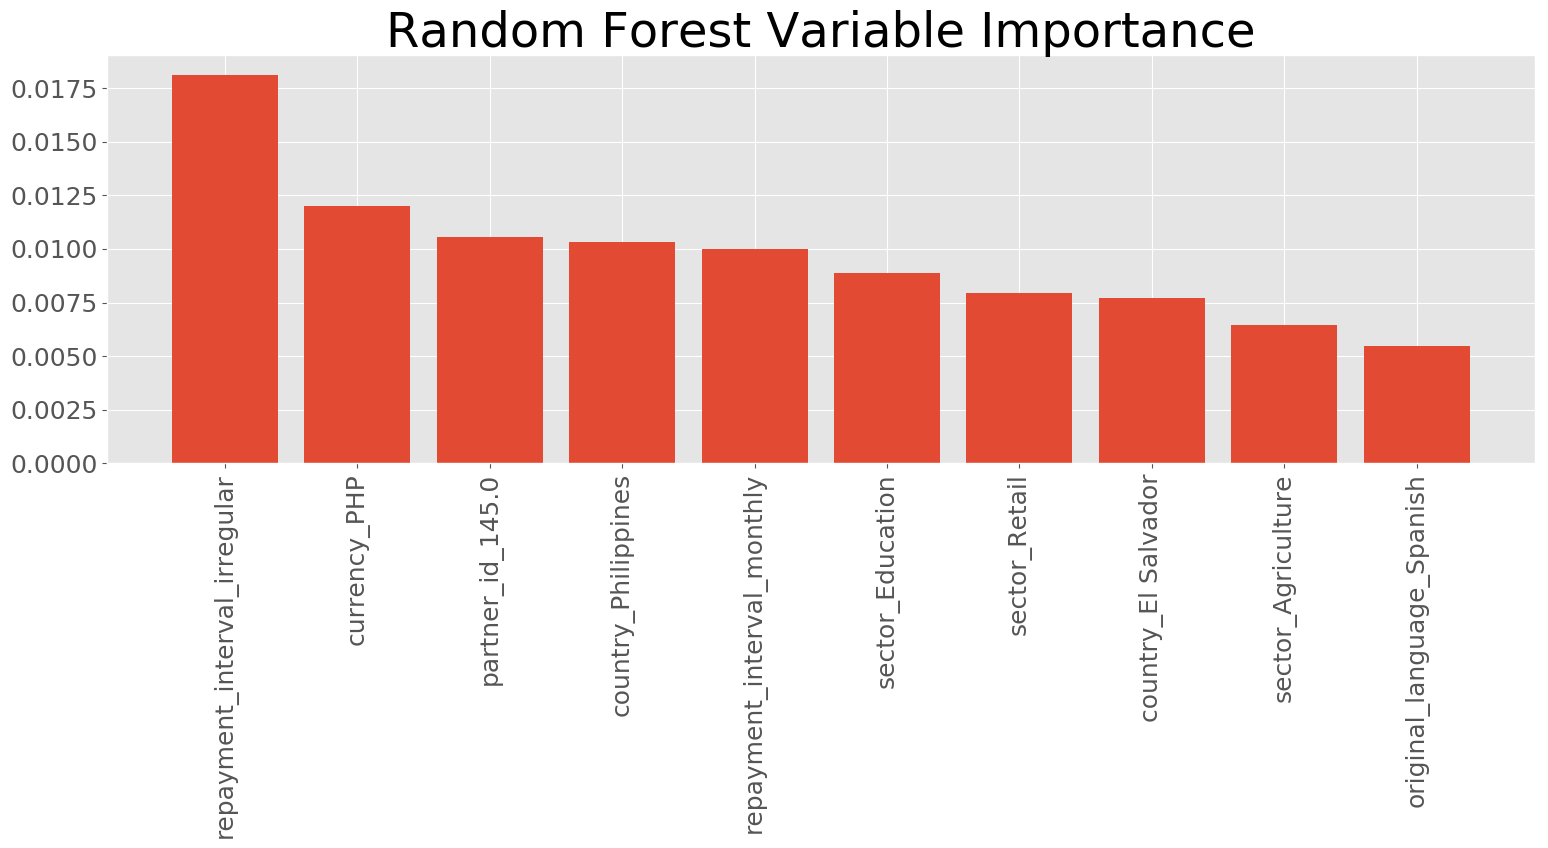

In [112]:
#Next top 10
var_imp = clf_brf.feature_importances_
order = var_imp.argsort()[::-1][:]
ml_data_trim.columns[order]

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 24})
plt.figure(figsize = (16,9))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

plt.bar(range(10), var_imp[order][10:20])
plt.xticks(range(10), ml_data_trim.columns.values[order][10:20], rotation='vertical')
plt.title("Random Forest Variable Importance")
plt.tight_layout()
plt.savefig('graphs/var_importance.png')

In [55]:
#Second cross validated RF solution
clf_rfb = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=193, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False).fit(X_train, y_train)
y_pred = clf_rfb.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
cm = confusion_matrix(y_test, y_pred)
cm

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 193 out of 193 | elapsed:  3.7min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s


0.932623890307


[Parallel(n_jobs=8)]: Done 193 out of 193 | elapsed:    1.7s finished


array([[109654,   6333],
       [  2782,   4994]], dtype=int64)

[[109654   6333]
 [  2782   4994]]


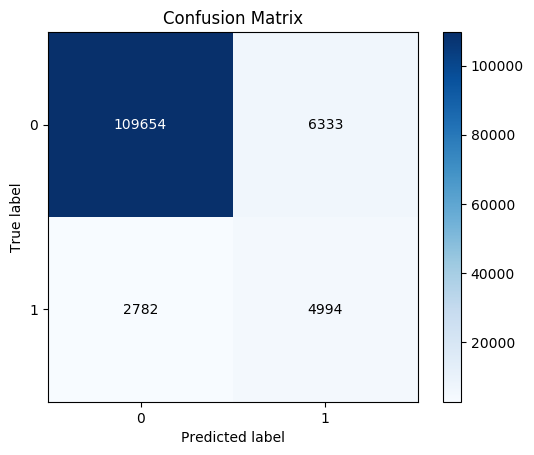

In [57]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
cm = confusion_matrix(y_test, y_pred)
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 193 out of 193 | elapsed:    1.8s finished


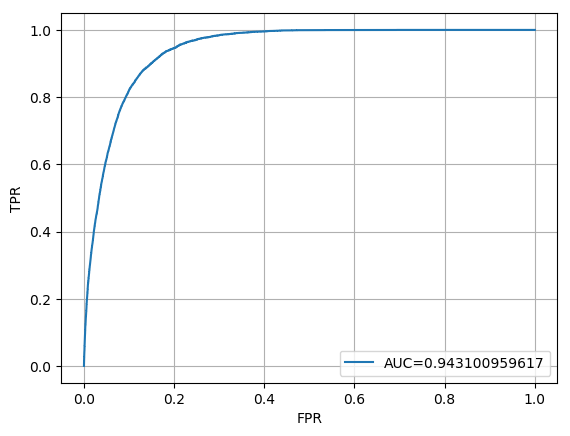

0.94216962896828105

In [59]:
y_pred = clf_rfb.predict_proba(X_test)
fpr8, tpr8, thresholds = roc_curve(y_test, [i[1] for i in y_pred], pos_label=1)
auc8 = auc(fpr8, tpr8)

plt.plot(fpr8, tpr8, label="AUC=" + str(auc1))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc8

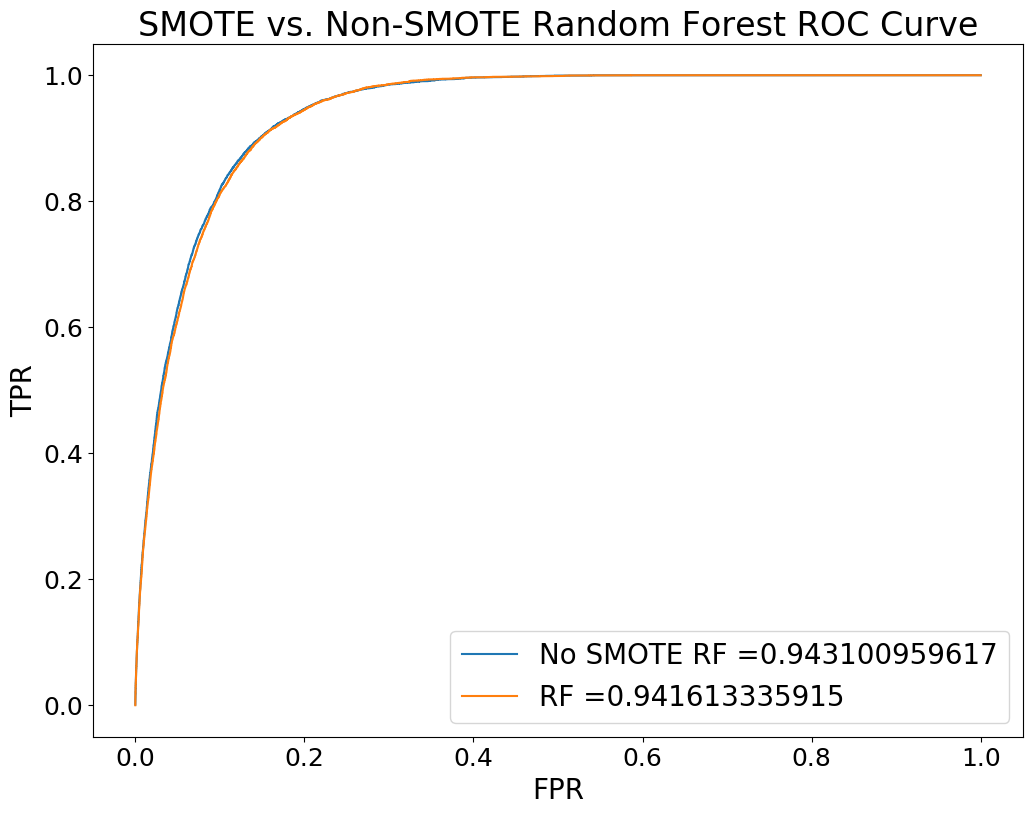

In [60]:
#Compare Smote and non smote Random Forest AUC
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize = (12,9))
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

plt.plot(fpr1, tpr1, label="No SMOTE RF =" + str(auc1))
plt.plot(fpr5, tpr5, label="RF =" + str(auc5))

plt.title("SMOTE vs. Non-SMOTE Random Forest ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.savefig("graphs/AUC_NonSMOTE.png")


## Logit Regression

In [14]:
range1 = np.logspace(-4, 3, 10)

log_score_list = []
for c in range1:
    log_score_list.append([c, detector_cross_val(linear_model.LogisticRegression(C=c), X_train, y_train, folds= 5)])
    print(c, end= " ")

0.0001 0.000599484250319 0.0035938136638 0.0215443469003 0.129154966501 0.774263682681 4.64158883361 27.8255940221 166.81005372 1000.0 

In [15]:
log_score_list.sort(reverse=True, key = lambda x: x[1])
log_score_list[0:5]

[[1000.0, 0.67286851340638765],
 [166.81005372000593, 0.6728197172615743],
 [27.825594022071257, 0.67257659776687739],
 [4.641588833612782, 0.67193710509369498],
 [0.774263682681127, 0.66954470264911092]]

In [61]:
clf_log = linear_model.LogisticRegression(C=1000).fit(X_train, y_train)
y_pred = clf_log.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.831712328546
0.776298247457


array([[89678, 26309],
       [ 1377,  6399]], dtype=int64)

[[89678 26309]
 [ 1377  6399]]


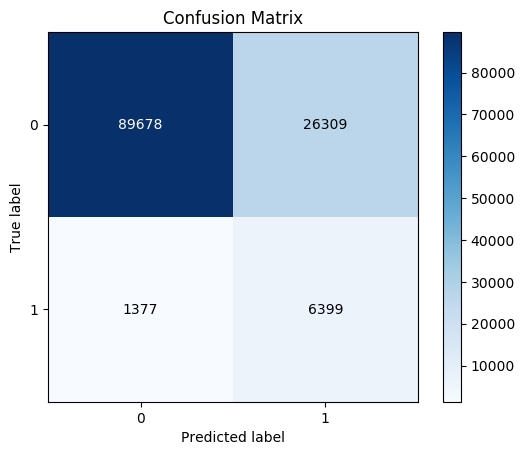

In [62]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
cm = confusion_matrix(y_test, y_pred)
print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

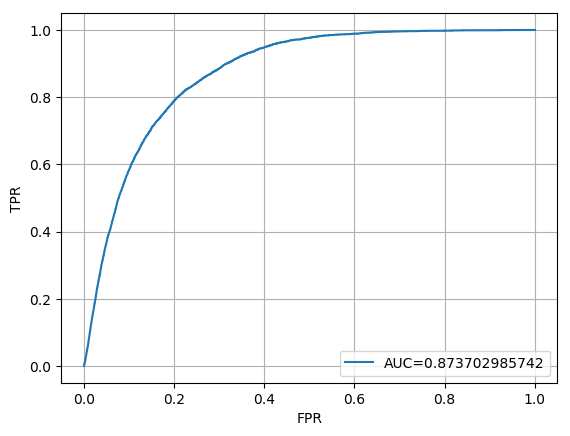

0.87370298574240668

In [63]:
y_pred = clf_log.predict_proba(X_test)
fpr6, tpr6, thresholds = roc_curve(y_test, [i[1] for i in y_pred], pos_label=1)

auc6 = auc(fpr6, tpr6)

plt.plot(fpr6, tpr6, label="AUC=" + str(auc6))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc6

In [70]:
confusion_matrix(y_test, [1 if i[1] >.60 else 0 for i in y_pred])

array([[100979,  15008],
       [  2617,   5159]], dtype=int64)

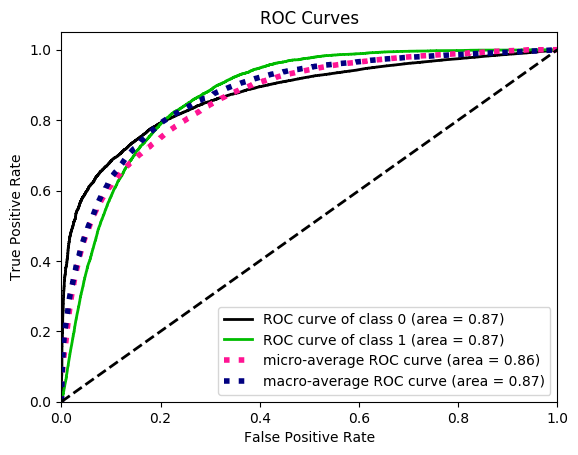

In [71]:
skplt.metrics.plot_roc_curve(y_test, y_pred)

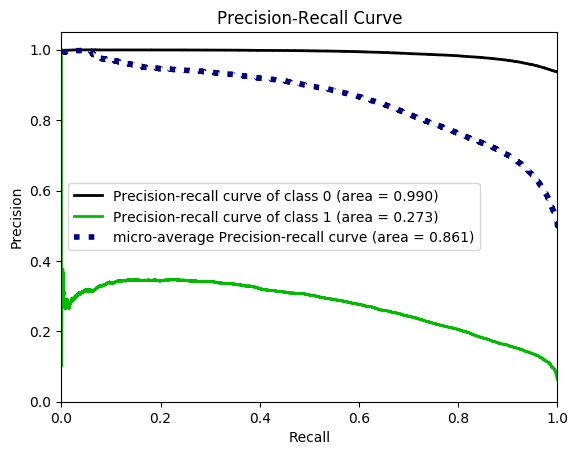

In [72]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

## Neural Nets

In [92]:
#Default classifier
fitted = MLPClassifier().fit(X_train, y_train)
y_pred = fitted.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

array([[96399, 13054],
       [ 1355,  6029]], dtype=int64)

In [74]:
fitted = MLPClassifier(learning_rate = 'adaptive', hidden_layer_sizes= (100,50,20), activation = "relu", random_state= 123).fit(X_train, y_train)

0.905992449143


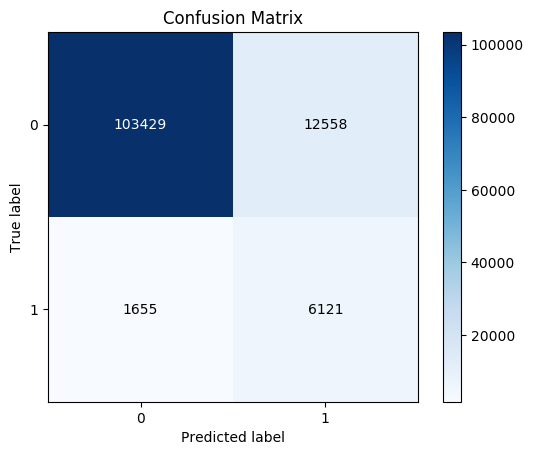

In [75]:
y_pred = fitted.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

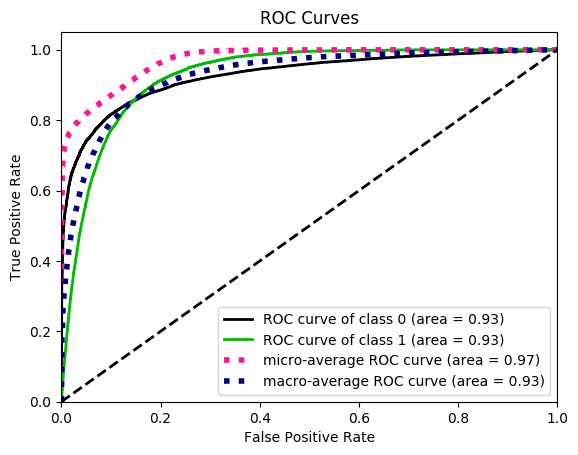

In [77]:
y_pred = fitted.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)

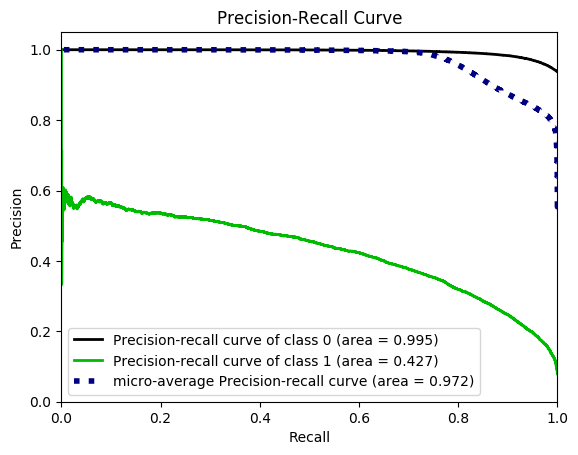

In [78]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

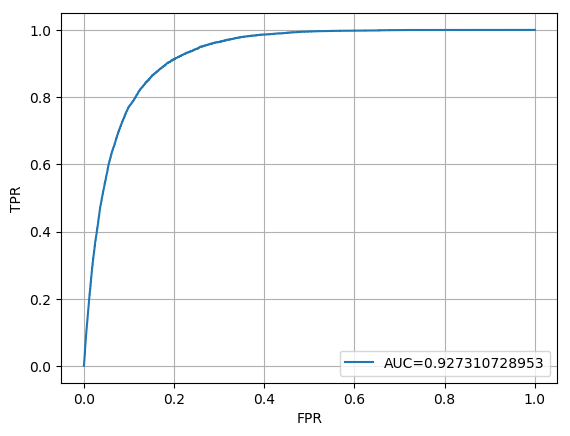

0.92731072895266631

In [79]:
fpr7, tpr7, thresholds = roc_curve(y_test, [i[1] for i in y_pred], pos_label=1)

#fpr7, tpr7, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc7 = auc(fpr7, tpr7)

plt.plot(fpr7, tpr7, label="AUC=" + str(auc7))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc7

In [16]:
fitted2 = MLPClassifier(learning_rate = 'adaptive', hidden_layer_sizes= (200,100,50), activation = "tanh", random_state= 123).fit(X_train, y_train)
y_pred = fitted2.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

0.909149434511


array([[98644, 10809],
       [ 1928,  5456]], dtype=int64)

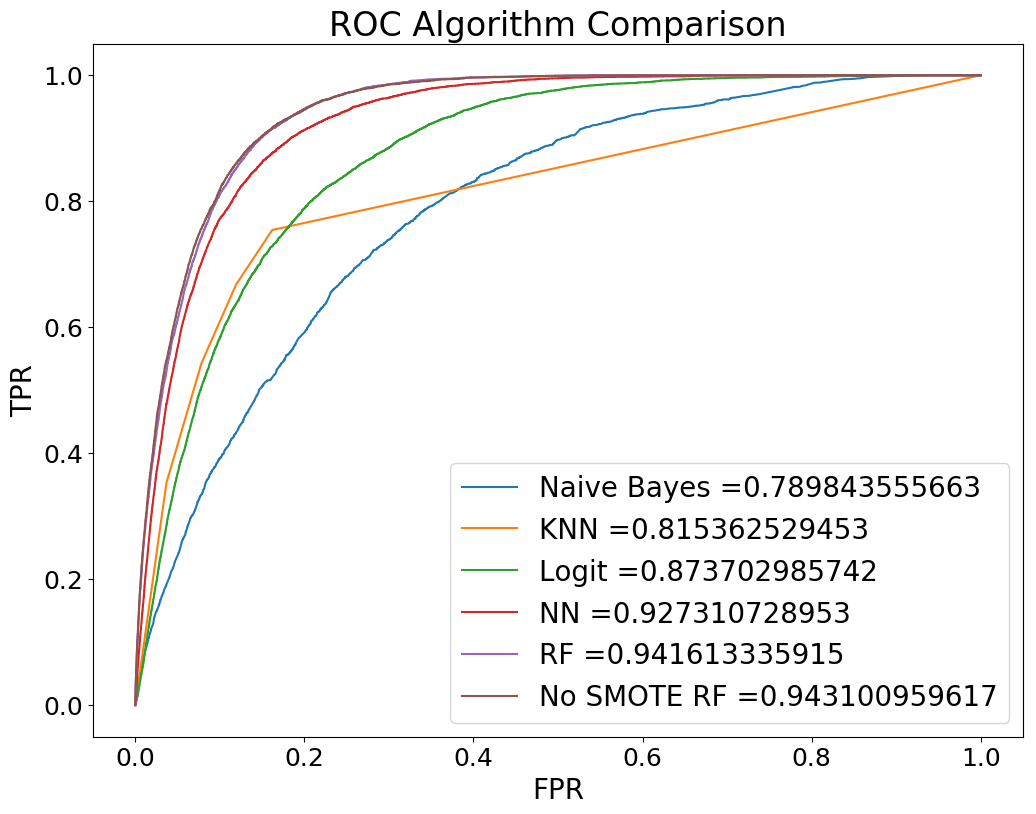

In [103]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize = (12,9))
plt.grid()
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

plt.plot(fpr3, tpr3, label="Naive Bayes =" + str(auc3))
#plt.plot(fpr4, tpr4, label="SVM =" + str(auc4))
plt.plot(fpr2, tpr2, label="KNN =" + str(auc2))
plt.plot(fpr6, tpr6, label="Logit =" + str(auc6))
plt.plot(fpr7, tpr7, label="NN =" + str(auc7))
plt.plot(fpr5, tpr5, label="RF =" + str(auc5))
plt.plot(fpr1, tpr1, label="No SMOTE RF =" + str(auc1))

plt.title("ROC Algorithm Comparison")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.savefig("graphs/AUC_algos.png")

plt.show() 


## Ensemble

In [28]:
#clf_log
#fitted
#clf_brf
eclf = VotingClassifier(estimators=[('log', clf_log),('rf', clf_brf), ('nn', fitted)], voting='soft', weights=[.2, .3,.5])#, n_jobs=-1)
clf_log = clf6.fit(X_train,y_train)
fitted = clf7.fit(X_train,y_train)
clf_brf = clf_rfb.fit(X_train,y_train)
eclf = eclf.fit(X_train,y_train)
y_pred = eclf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
confusion_matrix(y_test, y_pred)

0.928885767153


array([[102142,   7311],
       [  2110,   5274]], dtype=int64)

In [106]:
res1 = fitted.predict_proba(X_test)
res2 = clf_log.predict_proba(X_test)
res3 = clf_brf.predict_proba(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.5s finished


In [104]:
probs = []
for i in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    for j in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
        for k in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
            if sum([i,j,k])== 1:
                probs.append([i,j,k])

In [109]:
escores = []
for p in probs:
    #temp = [1 if (p[0]*i[1]+p[1]*j[1]+p[2]*k[1])/sum(p) >= .5 else 0 for i,j,k in zip(res1,res2,res3)]
    temp = [(p[0]*i[1]+p[1]*j[1]+p[2]*k[1])/sum(p) for i,j,k in zip(res1,res2,res3)]
    temp1 = [1 if i >.5 else 0 for i in temp]
    fpr9, tpr9, thresholds = roc_curve(y_test, temp, pos_label=1)
    auc9 = auc(fpr9, tpr9)
    escores.append([p, f1_score(y_test, temp1, average='weighted'), confusion_matrix(y_test, temp1), auc9])

In [110]:
escores.sort(reverse=True, key = lambda x: x[3])
escores

[[[0.2, 0.1, 0.7], 0.92001995298528849, array([[105882,  10105],
         [  1641,   6135]], dtype=int64), 0.94477887898587043],
 [[0.1, 0.1, 0.8], 0.9204327704159283, array([[106058,   9929],
         [  1717,   6059]], dtype=int64), 0.94432202879466309],
 [[0.2, 0, 0.8], 0.92161739358518813, array([[106309,   9678],
         [  1750,   6026]], dtype=int64), 0.94429578130758307],
 [[0.3, 0.1, 0.6], 0.91793603800864665, array([[105501,  10486],
         [  1628,   6148]], dtype=int64), 0.9441969748693988],
 [[0.2, 0.2, 0.6], 0.91765779136354475, array([[105327,  10660],
         [  1536,   6240]], dtype=int64), 0.94410958525098654],
 [[0.3, 0, 0.7], 0.9194907610834584, array([[105901,  10086],
         [  1722,   6054]], dtype=int64), 0.94383443845310333],
 [[0.1, 0, 0.9], 0.92215028836256341, array([[106509,   9478],
         [  1828,   5948]], dtype=int64), 0.9437398874052545],
 [[0.1, 0.2, 0.7], 0.91793426698470248, array([[105442,  10545],
         [  1585,   6191]], dtype=int64), 

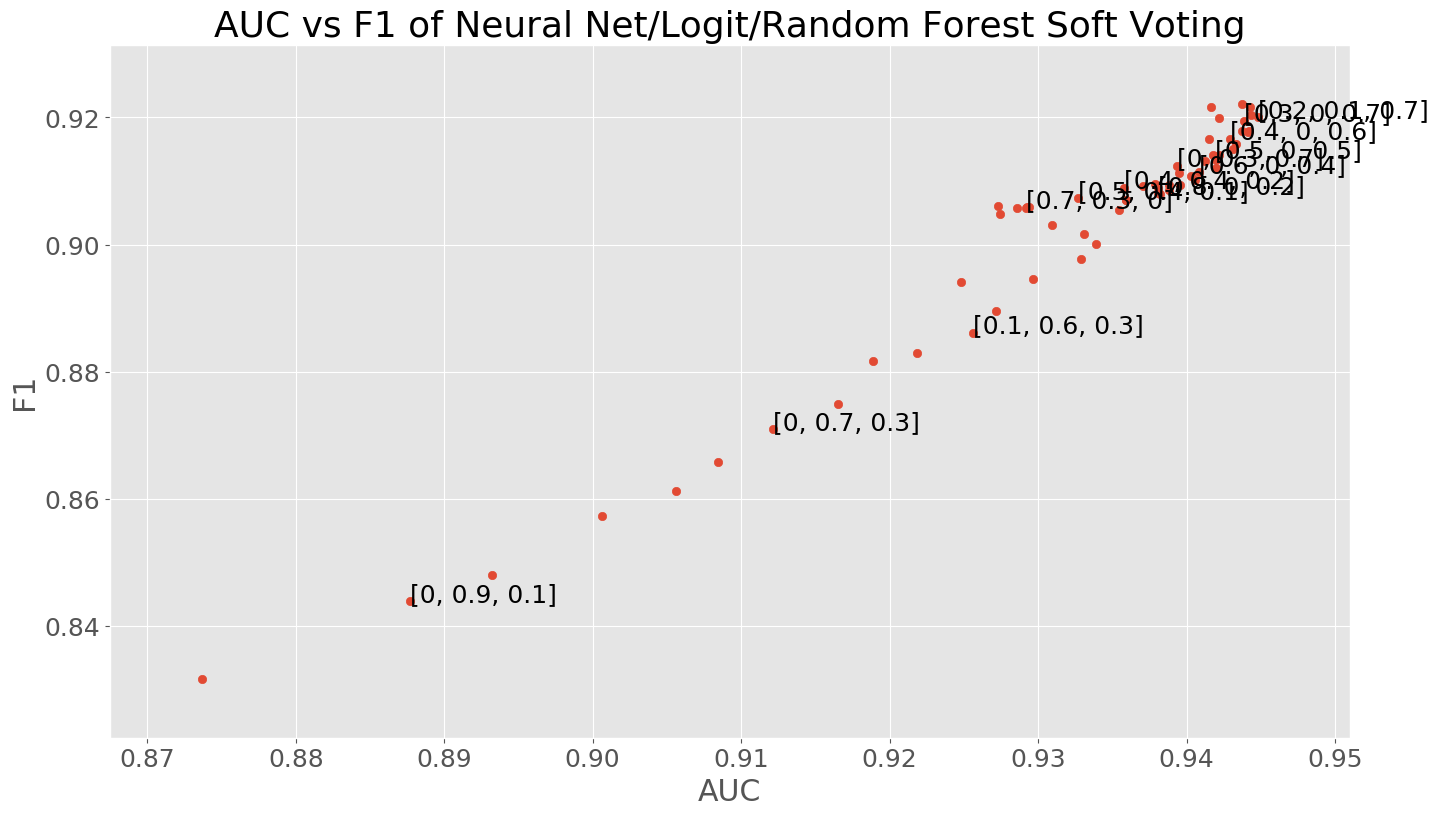

In [111]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})

fig, ax = plt.subplots()
#plt.figure(figsize = (16,9))
fig.set_size_inches((16,9))
#plt.pyplot.grid()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.xlabel("AUC")
plt.ylabel("F1")
plt.title("AUC vs F1 of Neural Net/Logit/Random Forest Soft Voting")
aucs_ = [i[3] for i in escores]
f1s = [i[1] for i in escores]
labels = [i[0] for i in escores]         
            

ax.scatter(aucs_, f1s)

for i, label in enumerate(labels):
    if i % 5 == 0:
        ax.annotate(label, (aucs_[i],f1s[i]))
        
plt.savefig('graphs/Soft_Voting.png')

In [48]:
f1_score(y_test, temp, average='weighted')

0.9284161480789912

In [ ]:
#y_pred = clf8.predict(X_test)
#print(f1_score(y_test, y_pred, average='weighted'))
#confusion_matrix(y_test, y_pred)

In [30]:
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.935193428706
0.932298843688


array([[104746,   4707],
       [  3203,   4181]], dtype=int64)

[[104746   4707]
 [  3203   4181]]


([<matplotlib.axis.YTick at 0x29f01a1bdd8>,
 <a list of 2 Text yticklabel objects>)

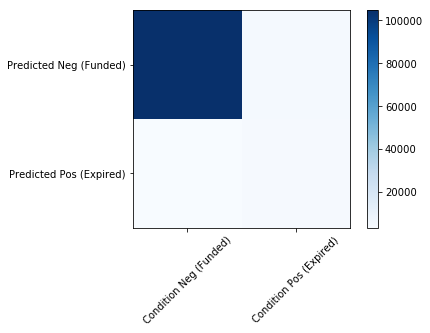

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Condition Neg (Funded)", "Condition Pos (Expired)"], rotation=45)
plt.yticks(tick_marks, ["Predicted Neg (Funded)", "Predicted Pos (Expired)"])

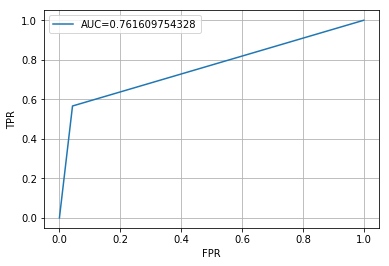

0.76160975432753497

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc1 = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC=" + str(auc1))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show() 
auc1

In [11]:
aucs =[]
clf6 = linear_model.LogisticRegression(C=1e5)
clf7 = RandomForestClassifier(max_depth = None, n_estimators = 20, criterion = 'entropy')
percentages = [.7, .75, .8, .85, .9]
for i in percentages:
    eclf = VotingClassifier(estimators=[('log', clf6),('rf', clf7)], voting='soft', weights=[i,1-i])
    clf6 = clf6.fit(X_train,y_train)
    clf7 = clf7.fit(X_train,y_train)
    eclf = eclf.fit(X_train,y_train)
    y_pred = eclf.predict(X_test)
    print(f1_score(y_test, y_pred, average='weighted'))
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    auc1 = auc(fpr, tpr)
    aucs.append([i, f1, cm, auc1])

0.896690924299
0.879857210595
0.8602404127
0.839784346693
0.818655536335


In [12]:
aucs.sort(reverse=True, key = lambda x: x[3])
aucs[0:5]

[[0.75, 0.87985721059476629, array([[93348, 16105],
         [ 1701,  5683]], dtype=int64), 0.81124813559982045],
 [0.8, 0.86024041270012552, array([[89713, 19740],
         [ 1491,  5893]], dtype=int64), 0.80886276968899207],
 [0.7, 0.89669092429939246, array([[96634, 12819],
         [ 1999,  5385]], dtype=int64), 0.80608037999440507],
 [0.85, 0.83978434669262658, array([[86015, 23438],
         [ 1311,  6073]], dtype=int64), 0.80415818973200126],
 [0.9, 0.81865553633507815, array([[82304, 27149],
         [ 1157,  6227]], dtype=int64), 0.79763366017415915]]